In [22]:
#SVM without any pre-processing over original dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [24]:
DATADIR = 'dataset'
# CATEGORIES = ['1_normal','2_cataract','2_glaucoma','3_retina_disease']
CATEGORIES = ['1_normal','2_cataract']
IMG_SIZE= 500

dataset\1_normal
(1632, 2464, 3)


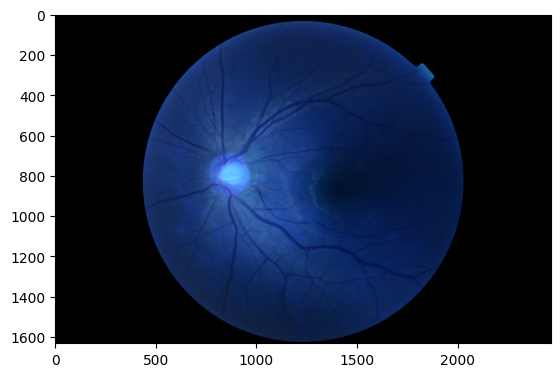

In [25]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [26]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()     

In [27]:
print(len(training_data))

400


In [28]:
lenofimage = len(training_data)

In [29]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [30]:
X.shape
X

array([[1, 1, 2, ..., 1, 0, 2],
       [0, 0, 0, ..., 1, 0, 2],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [31]:
X = X/255.0
X

array([[0.00392157, 0.00392157, 0.00784314, ..., 0.00392157, 0.        ,
        0.00784314],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.00784314],
       [0.        , 0.        , 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ]])

In [32]:
X[1]

array([0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
       0.00784314])

In [33]:
y=np.array(y)

In [34]:
y.shape

(400,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [36]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [37]:
y2 = svc.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.83


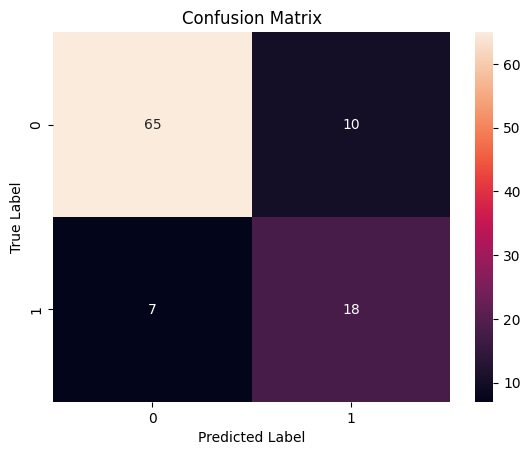

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y2)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [40]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.90      0.87      0.88        75
           1       0.64      0.72      0.68        25

    accuracy                           0.83       100
   macro avg       0.77      0.79      0.78       100
weighted avg       0.84      0.83      0.83       100



In [41]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [42]:
result.tail(10)

,original,predicted
90,0,0
91,0,0
92,1,1
93,0,1
94,0,0
95,0,0
96,0,0
97,1,0
98,0,0
99,1,1
